In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (18, 15) # (w, h)

/home/gmauro/anaconda3/envs/skmob/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
with open("../BikeNYC/v_train.txt", "rb") as fp:   
    train = pickle.load(fp)

# MoGAN #

In [3]:
import pickle

# CPC experiments
with open("../BikeNYC/experiments/cpc/MoGAN/1.txt", "rb") as fp:   # Unpickling
    exp_cpc_1_sim_nyc_bike_MoGAN = pickle.load(fp)
with open("../BikeNYC/experiments/cpc/MoGAN/2.txt", "rb") as fp:   # Unpickling
    exp_cpc_2_sim_nyc_bike_MoGAN = pickle.load(fp)
with open("../BikeNYC/experiments/cpc/MoGAN/3.txt", "rb") as fp:   # Unpickling
    exp_cpc_3_sim_nyc_bike_MoGAN = pickle.load(fp)    
    

# RMSE experiments
with open("../BikeNYC/experiments/rmse/MoGAN/1.txt", "rb") as fp:   # Unpickling
    exp_rmse_1_sim_nyc_bike_MoGAN = pickle.load(fp)
with open("../BikeNYC/experiments/rmse/MoGAN/2.txt", "rb") as fp:   # Unpickling
    exp_rmse_2_sim_nyc_bike_MoGAN = pickle.load(fp)
with open("../BikeNYC/experiments/rmse/MoGAN/3.txt", "rb") as fp:   # Unpickling
    exp_rmse_3_sim_nyc_bike_MoGAN = pickle.load(fp)    
 
 

In [4]:
def plot_JS_hist(exp1, exp2, exp3, ax, measure):
    
    if isinstance(exp1, np.ndarray):
        exp1 =  exp1.tolist()
    if isinstance(exp2, np.ndarray):
        exp2 =  exp2.tolist()
    

    sns.kdeplot(exp1, label = "Test", bw_method=0.5, ax=ax, color = "red",   linewidth=1)
    sns.kdeplot(exp2, label = "Synthetic", bw_method=0.5, ax=ax, color = "blue",  linewidth=1)
    sns.kdeplot(exp3, label = "Mixed", bw_method=0.5, ax=ax, color = "green", linewidth=3)

    ax.legend(fontsize = 24)
    ax.tick_params(labelsize=34)
    ax.set_xlabel(measure, fontsize = 34)
    ax.set_ylabel("density", fontsize = 34)
    ax.set_ylabel("", fontsize = 34)


## CPC ##

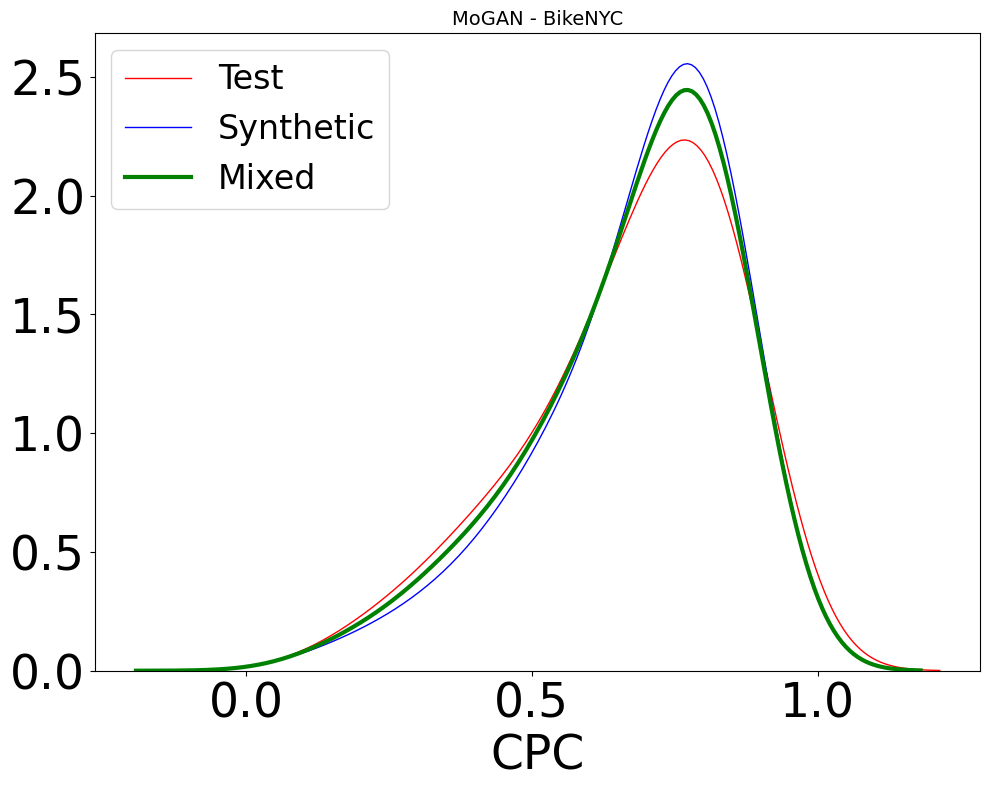

In [5]:
f, axs = plt.subplots(1, 1, figsize=(10,8))

# MoGAN #
js_nyc_bike_c = plot_JS_hist(exp_cpc_1_sim_nyc_bike_MoGAN, exp_cpc_2_sim_nyc_bike_MoGAN, exp_cpc_3_sim_nyc_bike_MoGAN, axs, "CPC",)

axs.set_title("MoGAN - BikeNYC", fontsize=14)


plt.tight_layout()
plt.show()


## RMSE ##

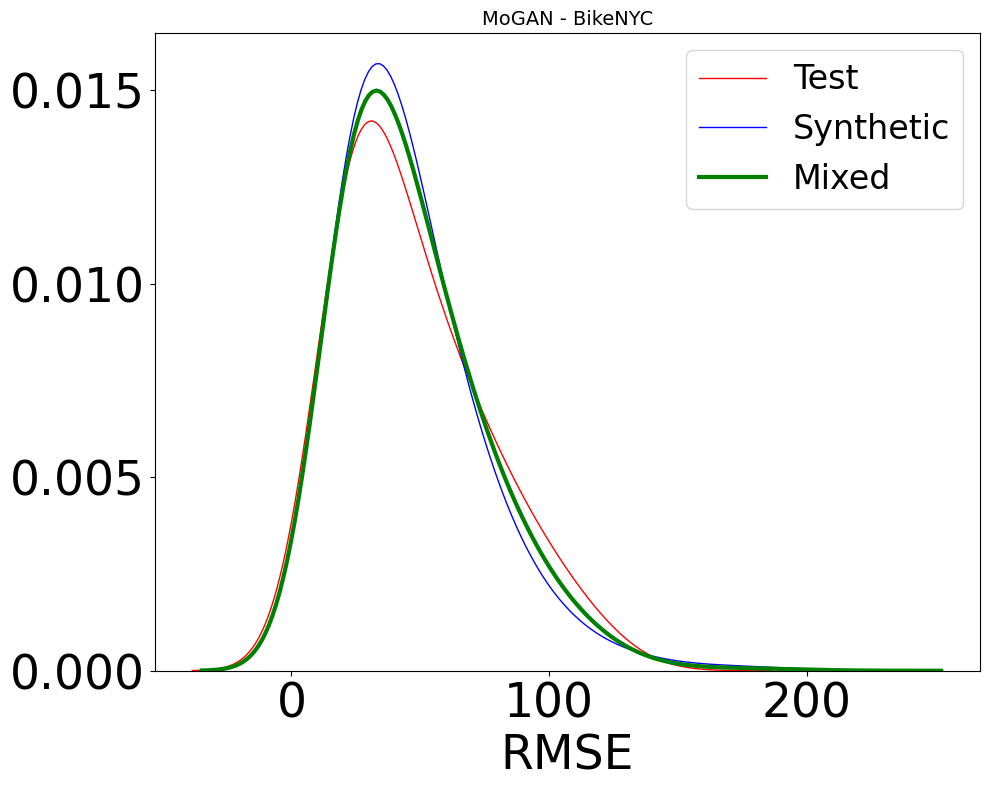

In [6]:
#as before, but for RMSE
f, axs = plt.subplots(1, 1, figsize=(10,8))

# MoGAN #
js_nyc_bike_c = plot_JS_hist(exp_rmse_1_sim_nyc_bike_MoGAN, exp_rmse_2_sim_nyc_bike_MoGAN, exp_rmse_3_sim_nyc_bike_MoGAN, axs, "RMSE")

axs.set_title("MoGAN - BikeNYC", fontsize=14)


plt.tight_layout()
plt.show()



In [7]:
with open("../BikeNYC/v_test.txt", "rb") as fp:   # Unpickling
            test_set = pickle.load(fp)
with open("../BikeNYC/fake_set.txt", "rb") as fp:   # Unpickling
            fake_set = pickle.load(fp)


m1 = test_set[16]
m2 = fake_set[0]
np.max(m1), np.max(m2)

(897, 1728)

/tmp/ipykernel_2720057/4167794475.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("viz.pdf", bbox_inches='tight')
/tmp/ipykernel_2720057/4167794475.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("viz.pdf", bbox_inches='tight')
/home/gmauro/anaconda3/envs/skmob/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


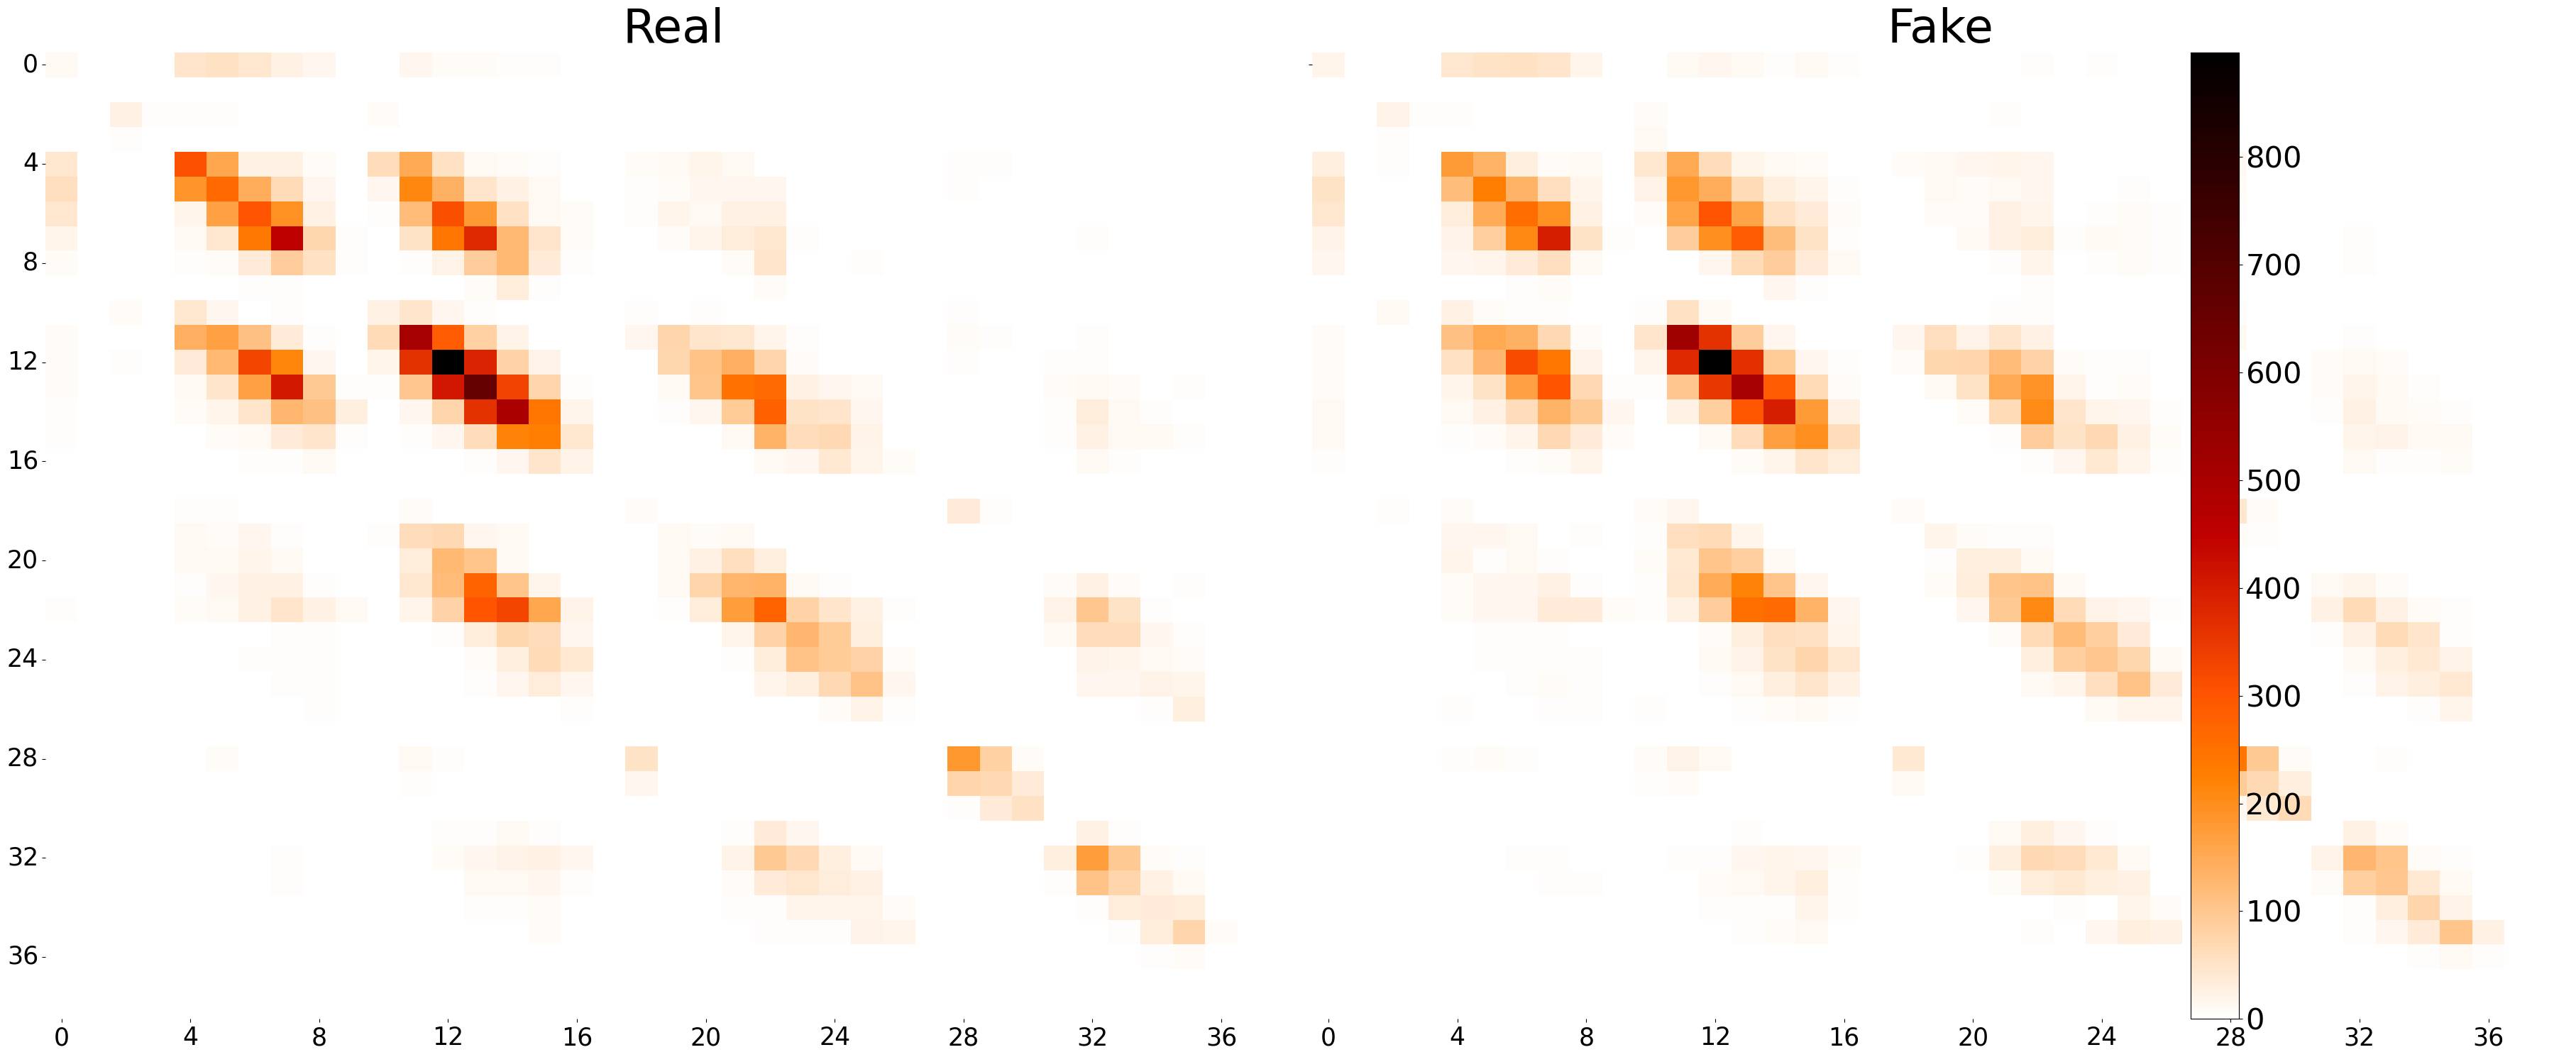

In [8]:
plt.rcParams["figure.figsize"] = [36.4, 15]
plt.rcParams["figure.autolayout"] = True


fig, ax = plt.subplots(1, 2)

fig.tight_layout()

#First
im = sns.heatmap(m1[5:44,5:44], ax=ax[0], cmap='gist_heat_r', xticklabels = 4, yticklabels = 4, cbar = False)
ax[0].set_title('Real',fontsize=48)
ax[0].tick_params(axis='both', which='major', labelsize=25)
ax[0].tick_params(axis='y', rotation=0)

#Second

sns.heatmap(m2[5:44,5:44], ax=ax[1], cmap='gist_heat_r', xticklabels = 4, yticklabels = [""],  cbar = False)
ax[1].set_title('Fake',fontsize=48)
ax[1].tick_params(axis='x', which='major', labelsize=25)



mappable = im.get_children()[0]
plt.colorbar(mappable, ax = [ax[0],ax[1]], pad = -0.32)

cbar = ax[0].collections[0].colorbar
cbar.ax.tick_params(labelsize=30)

#plt.show()

plt.savefig("viz.pdf", bbox_inches='tight')